## 서울 지역 분류 실습

서울 지역(구)의 경도와 위도 정보를 사용하여, 임의로 입력된 지역(동)을
강동, 강서, 강남, 강북으로 분류

In [1]:
import pandas as pd
import numpy as np 

np.random.seed(5)

### 컬럼 주석
district: 행정구역 ex) 서초구, 송파구, 용산구

dong: 구(district)보다 작은 행정구역 ex) 대치동, 도곡동

longitude: 경도

latitude: 위도

label: 한강 기준으로 동,서,남,북으로 구분한 지역 명칭

In [2]:
# train dataset

district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [3]:
train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude','latitude','label']]

In [4]:
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


In [5]:
# test dataset

dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [6]:
test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong','longitude','latitude','label']]

In [7]:
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [8]:
train_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [9]:
test_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [10]:
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


### 데이터 시각화

In [11]:
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [12]:
from sklearn import tree
import numpy as np 
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [13]:
def display_decision_surface(clf, X, y) :
    
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = 'rywb'
    plot_step=0.001
    
    xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X.loc[idx].longitude,
                   X.loc[idx].latitude,
                   c=color,
                   label=le.classes_[i],
                   cmap=plt.cm.RdYlBu, edgecolor='black', s=200)
        
    # 챠트 제목
    plt.title("Decision surface of a decision tree",fontsize=16)
    # 챠트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    # x축의 이름과 폰트 크기 설정
    plt.xlabel('longitude',fontsize=16)
    # y축의 이름과 폰트 크기 설정
    plt.ylabel('latitude',fontsize=16)
    # 챠트 크기 설정
    plt.rcParams["figure.figsize"] = [7,5]
    # 챠트 폰트 크기 설정
    plt.rcParams["font.size"] = 14
    # x축 좌표상의 폰트 크기 설정
    plt.rcParams["xtick.labelsize"] = 14
    # y축 좌표상의 폰트 크기 설정
    plt.rcParams["ytick.labelsize"] = 14

    # 챠트 그리기
    plt.show()

C:\Users\H\ssac\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


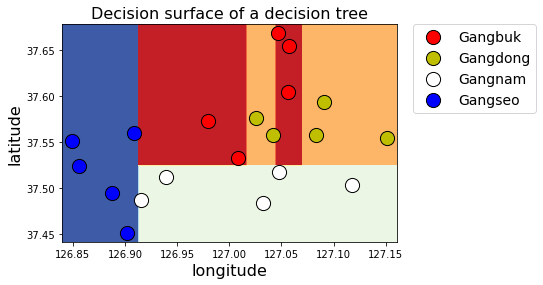

In [14]:
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)

clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)
display_decision_surface(clf,X_train, y_encoded)

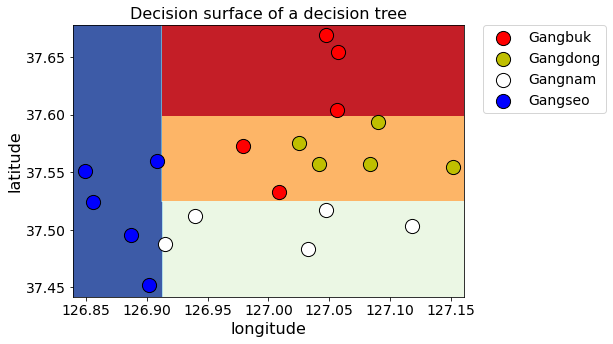

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=3, 
                                  min_samples_split=3,
                                  min_samples_leaf=3, 
                                  random_state=5).fit(X_train, y_encoded.ravel())
display_decision_surface(clf,X_train, y_encoded)

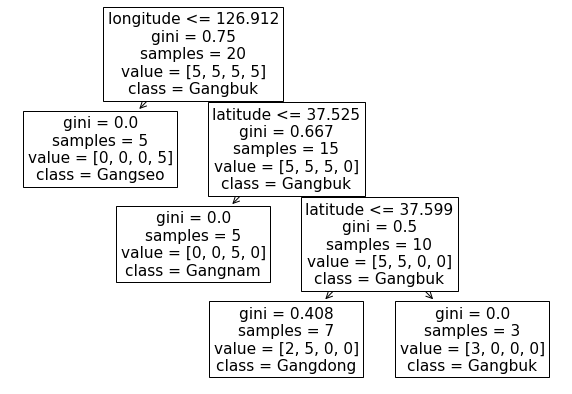

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(clf,feature_names=['longitude','latitude'],
          class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'])
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)

In [18]:
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), le.classes_[pred])) )

accuracy : 0.9


In [36]:
# 싹 캠퍼스, 국회의사당, 잠실주경기장, 고려대학교
X_ssac = pd.DataFrame({'longitude':[37.517804768177974 , 37.532271587379526 ,37.51596600907998 ,37.59101654242747],
                       'latitude':[126.88636982387695,126.9141627699101,127.0727231822373,127.0277926650902]})
X_ssac

,longitude,latitude
0,37.517805,126.886370
1,37.532272,126.914163
2,37.515966,127.072723
3,37.591017,127.027793


In [37]:
pred2 = clf.predict(X_ssac)
pred2

array([3, 3, 3, 3])

In [38]:
le.inverse_transform(pred2)

array(['Gangseo', 'Gangseo', 'Gangseo', 'Gangseo'], dtype=object)

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])